In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle as pkl
from scipy.stats import randint as sp_randint

In [2]:
train_df = pd.read_csv('X_train2.csv')
# train_df = pd.read_csv('X_train1.csv')

In [3]:
train_df.head()

,id,age,year,month,day,tfa_year,tfa_month,tfa_day,timediff,gender_-unknown-,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
0,d1mm9tcy42,62.0,2014,1,1,2014,1,1,0,0,...,0.0,23.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
1,yo8nz8bqcq,-1.0,2014,1,1,2014,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4grx6yxeby,-1.0,2014,1,1,2014,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,ncf87guaf0,-1.0,2014,1,1,2014,1,1,0,1,...,0.0,32.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
4,4rvqpxoh3h,-1.0,2014,1,1,2014,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# train_df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
train_df.set_index('id',inplace=True)

In [6]:
with open('labels.pkl','rb') as f:
    Y = pkl.load(f)
    print(Y.shape)

(73812,)


In [7]:
# with open('labels1.pkl','rb') as f:
#     Y = pkl.load(f)
#     print(Y.shape)

In [8]:
train_df.head()

,age,year,month,day,tfa_year,tfa_month,tfa_day,timediff,gender_-unknown-,gender_FEMALE,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
id,,,,,,,,,,,,,,,,,,,,,
d1mm9tcy42,62.0,2014,1,1,2014,1,1,0,0,0,...,0.0,23.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
yo8nz8bqcq,-1.0,2014,1,1,2014,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4grx6yxeby,-1.0,2014,1,1,2014,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ncf87guaf0,-1.0,2014,1,1,2014,1,1,0,1,0,...,0.0,32.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
4rvqpxoh3h,-1.0,2014,1,1,2014,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,cv= 3,verbose=10,n_jobs=-1,)
random_cfl.fit(train_df,Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 52.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 163.3min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 220.5min remaining: 24.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 231.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [10]:
# displaying the best parameters
random_cfl.best_params_

{'subsample': 0.1,
 'n_estimators': 500,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 0.1}

In [11]:
#Using the best parameters to train the model
x_cfl=XGBClassifier(n_estimators=500,max_depth=5,learning_rate=0.01,colsample_bytree=0.1,subsample=0.1,nthread=-1)
x_cfl.fit(train_df,Y,verbose=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.1, gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=-1, objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.1, verbosity=1)

In [12]:
#storing the model in a pickle file
import pickle 
pickle.dump(x_cfl,open('xgboost2.pickle.dat','wb'))

In [13]:
classifier = pickle.load(open('xgboost2.pickle.dat','rb'))

In [14]:
test_df = pd.read_csv('X_test2.csv')

In [15]:
# test_df.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
test_df.head(15)

,id,age,year,month,day,tfa_year,tfa_month,tfa_day,timediff,gender_-unknown-,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
0,5uwns89zht,35.0,2014,7,1,2014,7,1,0,0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,jtl0dijy2j,-1.0,2014,7,1,2014,7,1,0,1,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,xx0ulgorjt,-1.0,2014,7,1,2014,7,1,0,1,...,0.0,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
3,6c6puo6ix0,-1.0,2014,7,1,2014,7,1,0,1,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
4,czqhjk3yfe,-1.0,2014,7,1,2014,7,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,szx28ujmhf,28.0,2014,7,1,2014,7,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,guenkfjcbq,48.0,2014,7,1,2014,7,1,0,0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,tkpq0mlugk,-1.0,2014,7,1,2014,7,1,0,1,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
8,3xtgd5p9dn,-1.0,2014,7,1,2014,7,1,0,1,...,0.0,84.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0
9,md9aj22l5a,-1.0,2014,7,1,2014,7,1,0,1,...,0.0,12.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0


In [17]:
test_df.set_index('id',inplace=True)

In [18]:
test_df.head()

,age,year,month,day,tfa_year,tfa_month,tfa_day,timediff,gender_-unknown-,gender_FEMALE,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
id,,,,,,,,,,,,,,,,,,,,,
5uwns89zht,35.0,2014,7,1,2014,7,1,0,0,1,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jtl0dijy2j,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx0ulgorjt,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
6c6puo6ix0,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
czqhjk3yfe,-1.0,2014,7,1,2014,7,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
# since in the problem statement it is mentioned that the we need to predict the top 5 destinations so we need to predict the probabilistic value of the test data
pred_probab = classifier.predict_proba(test_df)

In [20]:
# storing the predictions of each user_id in a dataframe with user_id as the index
pred_probab_df = pd.DataFrame(pred_probab,index=test_df.index)

In [21]:
pred_probab_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
id,,,,,,,,,,,,
5uwns89zht,0.006311,0.007836,0.006622,0.010670,0.013884,0.010363,0.011210,0.684169,0.006666,0.005340,0.201046,0.035881
jtl0dijy2j,0.005031,0.006574,0.005306,0.008771,0.011664,0.008005,0.009484,0.814104,0.005452,0.004398,0.096732,0.024480
xx0ulgorjt,0.005200,0.007833,0.005990,0.010318,0.015338,0.009349,0.011470,0.776496,0.005881,0.004881,0.115377,0.031867
6c6puo6ix0,0.004960,0.006811,0.005262,0.008926,0.013615,0.008405,0.010262,0.807296,0.005374,0.004478,0.097111,0.027500
czqhjk3yfe,0.008975,0.018788,0.010090,0.019203,0.043401,0.023442,0.030937,0.239594,0.011930,0.008748,0.498755,0.086137


In [22]:
# The dictionary is the label encoding of the countries feature
output_classes = {'AU': 0,
 'CA': 1,
 'DE': 2,
 'ES': 3,
 'FR': 4,
 'GB': 5,
 'IT': 6,
 'NDF': 7,
 'NL': 8,
 'PT': 9,
 'US': 10,
 'other': 11}

In [23]:
# inverting the dictionary
inv_classes = {v:k for k,v in output_classes.items()}

In [24]:
inv_classes

{0: 'AU',
 1: 'CA',
 2: 'DE',
 3: 'ES',
 4: 'FR',
 5: 'GB',
 6: 'IT',
 7: 'NDF',
 8: 'NL',
 9: 'PT',
 10: 'US',
 11: 'other'}

In [25]:
# taking the indices from 0-11
indices = np.arange(0,12)

In [26]:
#prediction values of the first user_id
pred_probab[0]

array([0.00631142, 0.007836  , 0.00662248, 0.0106699 , 0.01388393,
       0.0103634 , 0.01121025, 0.68416893, 0.00666647, 0.00534033,
       0.20104554, 0.03588141], dtype=float32)

In [27]:
# creating a dictionary of the predictio and indices value
pred_dict = dict(zip(indices,pred_probab[0]))

In [28]:
# sorting the dictionary and taking only the top 5 values
sorted_abc = sorted(pred_dict.items(),key=lambda x:x[1],reverse=True)[:5]

In [29]:
sorted_abc

[(7, 0.68416893),
 (10, 0.20104554),
 (11, 0.03588141),
 (4, 0.013883929),
 (6, 0.011210245)]

In [30]:
# taking only the index value of the tuple sorted_abc
row_indices = [x[0] for x in sorted_abc]

In [31]:
row_indices

[7, 10, 11, 4, 6]

In [32]:
# taking the indices and giving the country names 
top_five =[inv_classes[i] for i in row_indices]

In [33]:
top_five

['NDF', 'US', 'other', 'FR', 'IT']

In [34]:
type(top_five)

list

In [35]:
# Combining the above steps into a fuction so that it can be applied to the prediction dataframe
def top_5_countries(s):
    """
    This function takes the probability values of each id, sorts the top 5 values and using an inverse dictionary(inv_classes) gives the top 5 countries prediction.
    """
    indices = np.arange(0,12)
    pred_dict = dict(zip(indices,s))
    sorted_abc = sorted(pred_dict.items(),key=lambda x:x[1],reverse=True)[:5]
    row_indices = [x[0] for x in sorted_abc]
    top_five = [inv_classes[i] for i in row_indices]
    return top_five

In [36]:
# here we apply the above function on each row of the dataframe to get the top 5 prediction.
pred_probab_df['top_five'] = pred_probab_df.apply(top_5_countries,axis=1)

In [37]:
pred_probab_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,top_five
id,,,,,,,,,,,,,
5uwns89zht,0.006311,0.007836,0.006622,0.010670,0.013884,0.010363,0.011210,0.684169,0.006666,0.005340,0.201046,0.035881,"[NDF, US, other, FR, IT]"
jtl0dijy2j,0.005031,0.006574,0.005306,0.008771,0.011664,0.008005,0.009484,0.814104,0.005452,0.004398,0.096732,0.024480,"[NDF, US, other, FR, IT]"
xx0ulgorjt,0.005200,0.007833,0.005990,0.010318,0.015338,0.009349,0.011470,0.776496,0.005881,0.004881,0.115377,0.031867,"[NDF, US, other, FR, IT]"
6c6puo6ix0,0.004960,0.006811,0.005262,0.008926,0.013615,0.008405,0.010262,0.807296,0.005374,0.004478,0.097111,0.027500,"[NDF, US, other, FR, IT]"
czqhjk3yfe,0.008975,0.018788,0.010090,0.019203,0.043401,0.023442,0.030937,0.239594,0.011930,0.008748,0.498755,0.086137,"[US, NDF, other, FR, IT]"


In [38]:
# ungrouping the list values of the top_five column
s = pred_probab_df.apply(lambda x: pd.Series(x['top_five']),axis=1).stack().reset_index(level=1,drop=True)
s.name = 'country'

In [39]:

submission = pred_probab_df.drop([i for i in range(0,12)] + ['top_five'],axis=1).join(s)
submission.head()

,country
id,
0010k6l0om,NDF
0010k6l0om,US
0010k6l0om,other
0010k6l0om,FR
0010k6l0om,IT


In [40]:
submission.to_csv('submission8.csv')

## The final Public Score(ndcg)

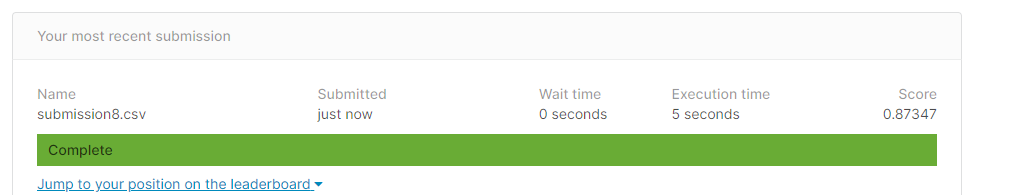

## The final public and private score

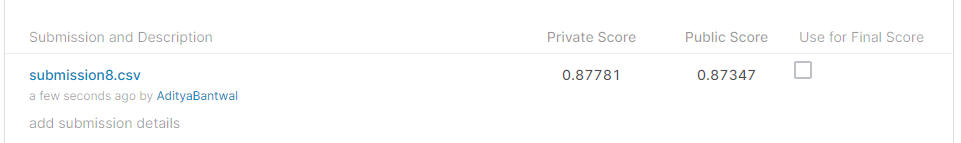

## Conclusion

#### The official Kaggle score is 0.87347 which can be further improved by using some text features from the train and session data and doing more hyper parameter tuning. I would like to conclude this notebook here.

## Thank You!